In [21]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import shap

In [22]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/home/lucas/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
#Compilação utilizando o adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
epochs = 10

history = model.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.4367 - loss: 1.5317 - val_accuracy: 0.5523 - val_loss: 1.2358
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5880 - loss: 1.1502 - val_accuracy: 0.6170 - val_loss: 1.0753
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6421 - loss: 1.0103 - val_accuracy: 0.6535 - val_loss: 0.9924
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6767 - loss: 0.9238 - val_accuracy: 0.6644 - val_loss: 0.9607
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6986 - loss: 0.8624 - val_accuracy: 0.6783 - val_loss: 0.9296
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7152 - loss: 0.8125 - val_accuracy: 0.6822 - val_loss: 0.9300
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7312 - loss: 0.7673 - val_accuracy: 0.6842 - val_loss: 0.9254
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7450 - loss: 0.7275 -

In [32]:
background = X_train[:100]  
test_images = X_test[:10]  

explainer = shap.DeepExplainer(model, background)

print(f"Background: {background.shape}")
print(f"Imagens de teste: {test_images.shape}")

Background: (100, 32, 32, 3)
Imagens de teste: (10, 32, 32, 3)


In [36]:
shap_values = explainer.shap_values(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Analisando imagem 1
Classe predita: cat
Classe real: cat


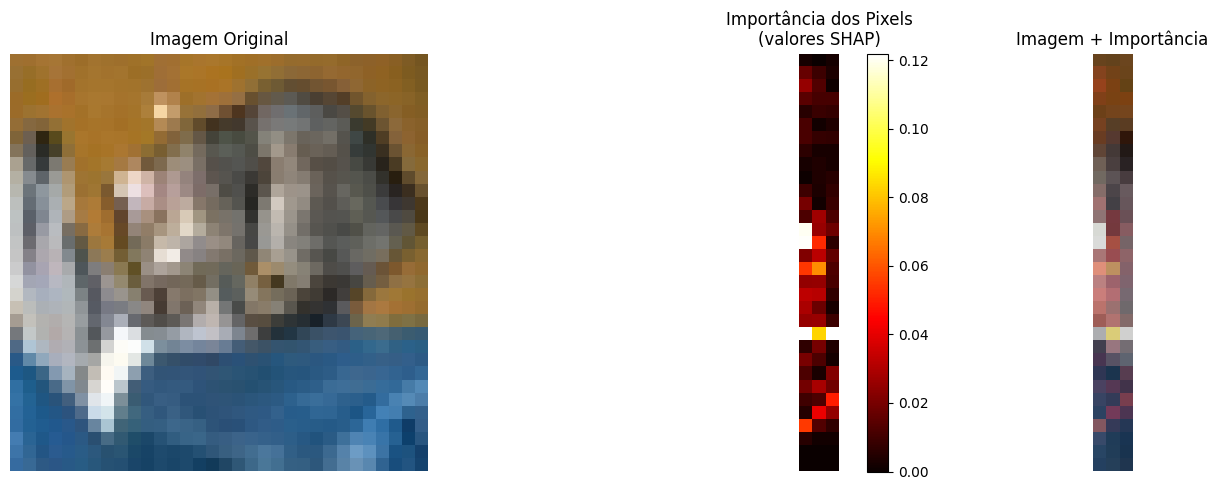

In [38]:
image_idx = 0
predicted_class = np.argmax(model.predict(test_images[image_idx:image_idx+1]))

print(f"Analisando imagem {image_idx + 1}")
print(f"Classe predita: {class_names[predicted_class]}")
print(f"Classe real: {class_names[y_test[image_idx][0]]}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(test_images[image_idx])
plt.title('Imagem Original')
plt.axis('off')

shap_img = shap_values[predicted_class][image_idx]
importance_map = np.sum(np.abs(shap_img), axis=2)

plt.subplot(1, 3, 2)
plt.imshow(importance_map, cmap='hot')
plt.title('Importância dos Pixels\n(valores SHAP)')
plt.colorbar()
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(test_images[image_idx])
plt.imshow(importance_map, alpha=0.4, cmap='hot')
plt.title('Imagem + Importância')
plt.axis('off')

plt.tight_layout()
plt.show()

In [42]:
image_idx = 0
predicted_class = np.argmax(model.predict(test_images[image_idx:image_idx+1]))
shap_img = shap_values[predicted_class][image_idx]
print(f"\nEstatísticas dos valores SHAP:")
print(f"- Valor máximo (maior impacto positivo): {np.max(shap_img):.6f}")
print(f"- Valor mínimo (maior impacto negativo): {np.min(shap_img):.6f}")
print(f"- Média dos valores: {np.mean(shap_img):.6f}")
print(f"- Desvio padrão: {np.std(shap_img):.6f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Estatísticas dos valores SHAP:
- Valor máximo (maior impacto positivo): 0.060802
- Valor mínimo (maior impacto negativo): -0.032351
- Média dos valores: 0.000000
- Desvio padrão: 0.006060
